<a href="https://colab.research.google.com/github/kkangji12/DAP/blob/main/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions.

The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted.

Clustering works by separating the training cases based on similarities that can be determined from their feature values.

## Seed dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml).

In [ ]:
import pandas as pd

# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/ml-basics/master/data/seeds.csv')

data.head()



area  perimeter  compactness  kernel_length  kernel_width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry_coefficient  groove_length  species  
0                  2.221          5.220        0  
1                  1.018          4.956        0  
2                  2.699          4.825        0  
3                  2.259          4.805        0  
4                  1.355          5.175        0

## Visualization - Scatter Plot

As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot. We should take advantage of a dimensionality reduction technique, however we did not cover yet.

Alternatively, we just chose choose two variable (`area`, `groove_length`) visualize the data.

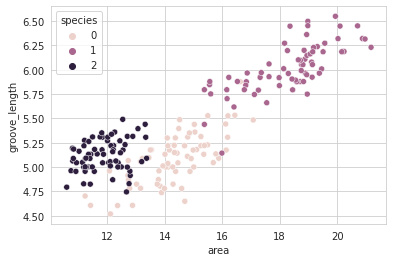

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.scatterplot(x='area', y='groove_length', data=data, hue='species')
plt.show()

## Set up DataFrame
Drop `species` values from DataFrame

In [ ]:
X = data.drop(columns='species')
X.head()

area  perimeter  compactness  kernel_length  kernel_width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry_coefficient  groove_length  
0                  2.221          5.220  
1                  1.018          4.956  
2                  2.699          4.825  
3                  2.259          4.805  
4                  1.355          5.175

## How many clusters?

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the `within cluster sum of squares` (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

$WCSS = \sum_{j=1}^k\sum_{i}^n\mathrm{dist}(x_i, C_j)^2$

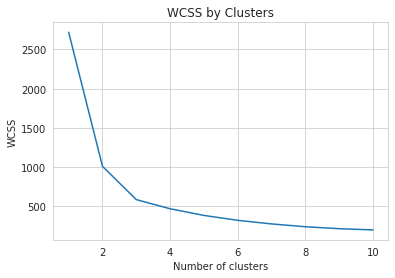

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## K-Means Clustering

The algorithm we used to create our test clusters is *K-Means*. This is a commonly used clustering algorithm that separates a dataset into *K* clusters of equal variance. The number of clusters, *K*, is user defined. The basic algorithm has the following steps:

**[TODO]** Let's try using K-Means on our seeds data with a `K` value of 3 with `random_state=0`.

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3,random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = X.copy()
X_withCluster['km_clusters'] = km_clusters
X_withCluster

area  perimeter  compactness  kernel_length  kernel_width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry_coefficient  groove_length  km_clusters  
0                    2.221          5.220            0  
1                    1.018          4.956            0  
2                    2.699          4.825            0  
3                    2.259          4.805            0  
4                    1.355          5.175            0  
..                     ...            ...          ...  
205                  3.631          4.870            2  
206                  4.325          5.003            2  
207                  8.315          5.056            2  
208                  3.598          5.044            2  
209                  5.637          5.063            2  

[210 rows x 8 columns]

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

### Agglomerative Nesting (AGNES) Clustering 
**[TODO]** Let's try using AGNES on our seeds data with a `average` linkage.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters



## Visulize the Clustering Results

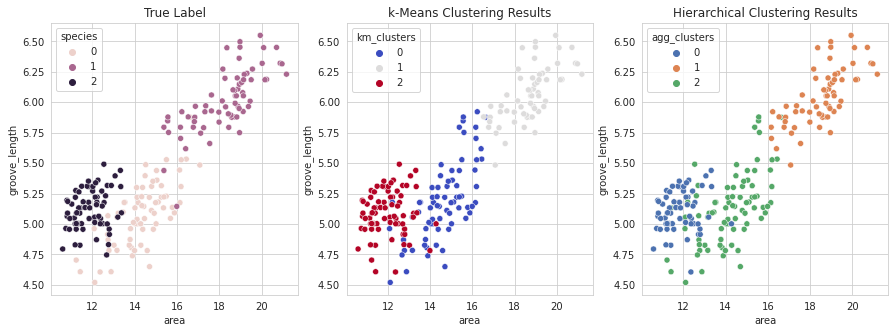

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='area', y='groove_length', data=data, hue='species',
           ax=ax[0])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='km_clusters',
           palette='coolwarm', ax=ax[1])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[2])
ax[0].set(title='True Label')
ax[1].set(title='k-Means Clustering Results')
ax[2].set(title='Hierarchical Clustering Results')

plt.show()

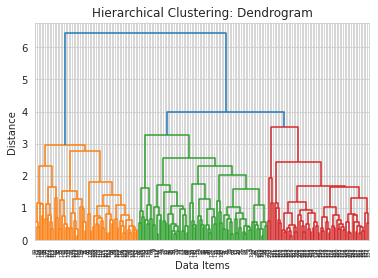

In [ ]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
dendrogram(linkage(X.values, method='average'), color_threshold=4)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.show()

# Evaluation

**[TODO]** Internal Evaluation with `Silhouette Score`

In [ ]:
from sklearn.metrics import silhouette_score

print('silhouette of kMeans: %f'%silhouette_score(X,km_clusters))
print('silhouette of Hierarchical Clustering: %f'%silhouette_score(X,agg_clusters))

silhouette of kMeans: 0.471934
silhouette of Hierarchical Clustering: 0.458112


**[TODO]** External Evaluation with `F1 Score`

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

target = data.species
print('kMeans')
print(classification_report(target, km_clusters))

_agg_clusters = agg_clusters.copy()
_agg_clusters[agg_clusters==0]=2  #임의의 순서를 맞춰주기 어떤색이 몇번인지 맞춰야 동일한 평가 가능
_agg_clusters[agg_clusters==2]=0 #임의의 순서를 맞춰주기

print('Hierarchical Clustering')
print(classification_report(target, _agg_clusters))

kMeans
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.98      0.86      0.92        70
           2       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

Hierarchical Clustering
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        70
           1       0.98      0.91      0.95        70
           2       0.95      0.87      0.91        70

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210



# [TODO]

## 이번 과제는 라이브 셀링에 관한 데이터입니다!

라이브 셀러(책, '라이브 커머스, 셀링의 기술' 참조)란?

[우리는 알게 모르게 이미 물건을 팔고 있다. 내가 산 전자제품이 마음에 들면 블로그에 자발적 후기를 올리고, 배달 음식을 시켜 먹어도 사진을 찍고 전문가 수준으로 맛을 표현해가며 앱에 평가를 적는다. 책을 읽고 리뷰를 써서 SNS에 공유하고, 캠핑을 다녀와서 그곳이 얼마나 아름다웠는지 사진으로 열변을 토한다. 내 리뷰를 보고 누군가 그 음식을 시켜먹었다면, 내가 찍은 사진을 보고 그 캠핑장을 방문했다면 여러분은 이미 셀러로서의 능력을 충분히 갖춘 셈이다. 

사람들은 이제 광고에 쉽게 넘어가지 않는다. 지인들의 평가, 직접 찍은 사진과 함께 공들여 쓴 자세한 리뷰, 평소에 팔로우하던 인플루언서의 소개를 보고 물건을 구매한 지 오래다.]

이 데이터에 속성들은 share를 얼마나했는지 comment를 얼마나 달았는지, link나 video, photo등에 대해서 어떤 감정표현을 남겼는지 나타내준다.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Live.csv')
df.head()

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      NaN      NaN      NaN  
1          0         0           0      NaN      NaN      NaN      NaN  
2          1         0           0      NaN      NaN      NaN      NaN  
3          0         0           0      NaN      NaN      NaN      NaN  
4          0         0           0      NaN      NaN      NaN      NaN

## 데이터 전처리
- Clustering은 Unsupervise Learning으로 정답값이 없이 결과를 도출해 내야 합니다!
- mapping을 통한 라벨링이나 drop등을 이용하여 자유롭게 전처리 해주세요!


In [ ]:
df = pd.get_dummies(df, prefix=['name'], columns=['status_type'])
X = df.drop(columns=['status_id','status_published','Column1','Column2','Column3','Column4'])

X

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  name_link  name_photo  name_status  \
0             1         1           0          0           0            0   
1             0         0           0          0           1            0   
2             1         0           0          0           0            0   
3             0         0           0          0           1            0   
4             0         0           0          0           1            0   
...         ...       ...         ...        ...         ...          ...   
7045          0         0           0          0           1            0   
7046          1         0           0          0           1            0   
7047          0         0           0          0           1            0   
7048          0         0           0          0           1            0   
7049          0         0           0          0           1            0   

      name_video  
0              1  
1              0  
2              1  
3              0  
4              0  
...          ...  
7045           0  
7046           0  
7047           0  
7048           0  
7049           0  

[7050 rows x 13 columns]

## Elbow analysis with K-MEANS

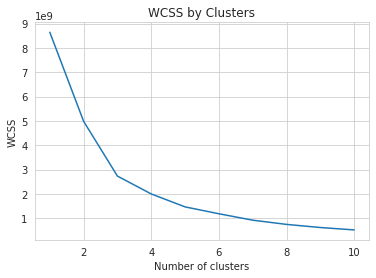

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K-means or Any other Clustering Methods

In [ ]:
from sklearn.cluster import AgglomerativeClustering
num_clusters=3
agg_model = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')


agg_clusters = agg_model.fit_predict(X)

pred = agg_clusters


# from sklearn.cluster import KMeans

# num_clusters=3

# km = KMeans(n_clusters=num_clusters)

# km.fit(X)

# pred= km.predict(X)




### Silhouette Coefficient값

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:", silhouette_score(X,pred))

Silhouette Coefficient: 0.9173653846706206


## 채점 기준

- Silhouette Coefficient 점수가 89 이상: 100점(만점)
- Silhouette Coefficient 점수가 85 이상, 89미만: 90점
- Silhouette Coefficient 점수가 80 이상, 85미만: 80점
- Silhouette Coefficient 점수가 80미만: 70점


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os, random

# Startup Data
In this lab, we would like to do multiple linear regression analysis with start-up dataset.

In [ ]:
dataPath = 'https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/'
df = pd.read_csv(dataPath + '50_Startups.csv')

df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

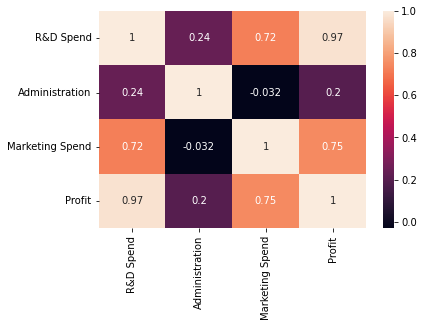

In [ ]:
sns.heatmap(df.drop(columns='State').corr() , annot=True)

# Independent and Dependent variables
There are total 5 features in the dataset.

**[TODO]** Split the data that `Profit` is our dependent feature, and the rest of them are our independent features:

In [ ]:
# separate the independent attributes from the predicting attribute
X = df.drop('Profit',axis=1)

# separte the dependent attribute into Y for model training 
y = df['Profit']

# Handling categorical variables
**[TODO]** In our dataset, there is one categorical column `State`, convert this categorical values present inside this column for that we will use pandas `get_dummies()` function:


In [ ]:
# handle categorical variable
X = pd.get_dummies(X)

X.head()

R&D Spend  Administration  Marketing Spend  State_California  \
0  165349.20       136897.80        471784.10                 0   
1  162597.70       151377.59        443898.53                 1   
2  153441.51       101145.55        407934.54                 0   
3  144372.41       118671.85        383199.62                 0   
4  142107.34        91391.77        366168.42                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

# Splitting Data
**[TODO]** Split the data into training (80%) and testing (20%) parts for that we use the scikit-learn `train_test_split()` function. Set `random_state` as `42`.

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Training model
**[TODO]** Apply the linear regression model to our training data, first of all, we have to import linear regression from the scikit-learn library.

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

R&D Spend  Administration  Marketing Spend  State_California  \
13   91992.39       135495.07        252664.93                 1   
39   38558.51        82982.09        174999.30                 1   
30   61994.48       115641.28         91131.24                 0   
45    1000.23       124153.04          1903.93                 0   
17   94657.16       145077.58        282574.31                 0   
48     542.05        51743.15             0.00                 0   
26   75328.87       144135.98        134050.07                 0   
25   64664.71       139553.16        137962.62                 1   
32   63408.86       129219.61         46085.25                 1   
19   86419.70       153514.11             0.00                 0   

    State_Florida  State_New York  
13              0               0  
39              0               0  
30              1               0  
45              0               1  
17              0               1  
48              0               1  
26              1               0  
25              0               0  
32              0               0  
19              0               1

In [ ]:
y_prediction = LR.predict(X_test)
y_prediction

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

# Evalutation
Compare the `y_prediction` values with the original values using `r2_score` and `RMSE`.

In [ ]:
# importing metrics module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.8987
root_mean_squared error of is 9055.96


# [Todo!] Regression 실습

자동차의 스펙에 기반해서 책정가격을 regression 기법을 통해 예상해보도록 하죠!

In [ ]:
df_price = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/CarPrice_Assignment.csv', index_col='car_ID').drop(columns =['CarName'])

In [ ]:
df_price

symboling fueltype aspiration doornumber      carbody drivewheel  \
car_ID                                                                     
1               3      gas        std        two  convertible        rwd   
2               3      gas        std        two  convertible        rwd   
3               1      gas        std        two    hatchback        rwd   
4               2      gas        std       four        sedan        fwd   
5               2      gas        std       four        sedan        4wd   
...           ...      ...        ...        ...          ...        ...   
201            -1      gas        std       four        sedan        rwd   
202            -1      gas      turbo       four        sedan        rwd   
203            -1      gas        std       four        sedan        rwd   
204            -1   diesel      turbo       four        sedan        rwd   
205            -1      gas      turbo       four        sedan        rwd   

       enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
car_ID                                                 ...               
1               front       88.6      168.8      64.1  ...         130   
2               front       88.6      168.8      64.1  ...         130   
3               front       94.5      171.2      65.5  ...         152   
4               front       99.8      176.6      66.2  ...         109   
5               front       99.4      176.6      66.4  ...         136   
...               ...        ...        ...       ...  ...         ...   
201             front      109.1      188.8      68.9  ...         141   
202             front      109.1      188.8      68.8  ...         141   
203             front      109.1      188.8      68.9  ...         173   
204             front      109.1      188.8      68.9  ...         145   
205             front      109.1      188.8      68.9  ...         141   

        fuelsystem boreratio stroke  compressionratio horsepower  peakrpm  \
car_ID                                                                      
1             mpfi      3.47   2.68               9.0        111     5000   
2             mpfi      3.47   2.68               9.0        111     5000   
3             mpfi      2.68   3.47               9.0        154     5000   
4             mpfi      3.19   3.40              10.0        102     5500   
5             mpfi      3.19   3.40               8.0        115     5500   
...            ...       ...    ...               ...        ...      ...   
201           mpfi      3.78   3.15               9.5        114     5400   
202           mpfi      3.78   3.15               8.7        160     5300   
203           mpfi      3.58   2.87               8.8        134     5500   
204            idi      3.01   3.40              23.0        106     4800   
205           mpfi      3.78   3.15               9.5        114     5400   

        citympg  highwaympg    price  
car_ID                                
1            21          27  13495.0  
2            21          27  16500.0  
3            19          26  16500.0  
4            24          30  13950.0  
5            18          22  17450.0  
...         ...         ...      ...  
201          23          28  16845.0  
202          19          25  19045.0  
203          18          23  21485.0  
204          26          27  22470.0  
205          19          25  22625.0  

[205 rows x 24 columns]

# 1. Data 전처리
Data를 원하는 방법으로 전처리하세요.
(ex. Imputation, Scaling)

그리고 독립변수 X와 종속변수 y를 나누어주세요.

**[팁]**

1. 데이터 전처리는 모델의 성능에 직접적으로 개입할 수 있는 몇 안되는 수단이에요.
2. 당장 regression에서는 유의미한 차이를 보기 힘들지도 몰라요, 하지만 나중에 더 어려운 데이터를 만났을 때는 큰 차이를 보이기도 한답니다.
3. 여러분의 선택으로 정해진 모델의 성능은 여러분의 점수에 영향을 미칠 예정이에요, 신중하게 선택해주세요.

**[고려할 수 있는 수단]**
1. Encoding은 필수겠네요? 어떤 encoding 방법을 선택할 지는 여러분께 달렸어요!
2. Scaler을 사용할지 안할지 또한 여러분의 선택이에요, 만약 사용해야한다면 어떤 Scaler을 사용할지 또한 고려하셔야겠네요?

In [ ]:
#corr이 높은 요소들 중 1개씩 삭제하여 전체 모델 성능을 올림
df_price=df_price.drop(columns=['peakrpm','boreratio'])

#df_price=df_price.drop(columns=['enginesize','curbweight'])'carwidth'  'highwaympg'  (boreratio carlength best) curbweight   boreratio','horsepower
#'carwidth','carlength'horsepower'
#sns.heatmap(df_price.corr() , annot=True)


#compressionratio 이상치를 제거한다. 단 이상인 경우만 제거해줌
df_price['compressionratio'].describe()
q1=df_price['compressionratio'].quantile(0.25)
q2=df_price['compressionratio'].quantile(0.5)
q3=df_price['compressionratio'].quantile(0.75)
iqr=q3-q1
condition=df_price['compressionratio']>q3+1.9*iqr
condition2=df_price['compressionratio']<q1-1.5*iqr



a=df_price[condition].index
#b=df_price[condition2].index
#df_price.drop(b,inplace=True)
df_price.drop(a,inplace=True)









df_price= df_price.astype({'price': 'int'})
## 원하는 방법으로 데이터를 전처리하세요 ##

X = df_price.drop('price',axis=1)
y = df_price['price']

X = pd.get_dummies(X)


#MaxAbsScaler 방식 scacling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_robust = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X=df_robust







In [ ]:
## X, y split ##
from sklearn.model_selection import train_test_split

# 2. Train_set, test_set 나누기
이제 학습에 사용할 데이터와 모델 검증에 사용할 테스트 데이터를 나눌 예정이에요.

**[조건]**
- test_size는 0.2로, random_state는 42로 지정해주세요
- 테스트 데이터는 절대 학습 과정에 관여하면 안돼요!
- 조건에 어긋난 경우, 채점을 하지 않을 예정이니 주의해주세요...!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# 3. 학습!

원하는 모델을 선언하세요. 참고로 regression 모델은 정말 많답니다. 이 문서를 참조해 보시겠어요?

https://scikit-learn.org/stable/supervised_learning.html

이곳에서 데이터에 적절하다고 생각되는 **regression model** 을 골라서 선언하세요. 그리고 2에서 나눈 데이터를 이용해 학습하는 거예요!

모델을 선언하는 예시는 제가 LinearRegression으로 만들어 보았어요. 참고해서 사용하세요!

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
rn import datasets
##############################################################3
rn.multiclass import OutputCodeClassifier
classifier=OutputCodeClassifier(n_estimators=3000)
#model = tree.DecisionTreeRegressor()
#model = model.fit(X_train, y_train)

classifier.fit(X_train,y_train)

from sklearn.linear_model import LinearRegression
#############################################################3
# # creating an object of LinearRegression class
# model = LinearRegression()

# # fitting the training data
# model.fit(X_train, y_train)


SyntaxError: ignored

# 4. 모델 평가

이제 모델을 평가해볼 시간이에요! 저는 여러분의 모델을 아래에 있는 **r2_score**와 **root_mean_squared_error**을 이용해서 채점할 예정이에요.

모델의 점수는 여러가지 원인으로 갈려요. 적절한 모델을 선택했는지, 그리고 그 모델에서 HyperParameter을 어떻게 설정했는지, 심지어 Data의 전처리 때문에 점수가 갈리는 경우도 있어요.

모델을 평가하는 코드를 완성하여 여러분의 모델을 채점해보세요.

In [ ]:
# 해당 점수로 채점할거예요.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
## 모델을 TEST 하는 코드 작성 ##

y_predict = classifier.predict(X_test)

## 채점은 여기서!
your_score = r2_score(y_test,y_predict)
print(f'R2_score is {your_score:.4f}, RMSE is {np.sqrt(mean_squared_error(y_test, y_predict)):.4f}')

# 5. 최종 채점

여러분의 과제는 모델의 RMSE 수치에 따라 채점될 예정이에요

채점 기준은 다음과 같으니 참고하시길 바래요.

**[채점 기준]**

- 이번 과제는 런타임 초기화 후, 처음으로 출력된 점수에 대해서만 평가해요.
- RMSE 수치가 2200 미만: **50점 (만점)**
- RMSE 수치가 2200 이상, 3000 미만: **45점**
- RMSE 수치가 3000 이상, 3500 미만: **35점**
- RMSE 수치가 3500 이상, 5000 미만: **25점**
- RMSE 수치가 5000 이상, 혹은 **R2_score가 0 미만**: **0점**

## **More...?**

만약 regression에 대해 조금 더 공부를 하시고 싶으시다면 아래의 자료로도 regression 모델을 만들어보세요.

해당 자료로 만들어진 모델은 채점에 들어가지 않으니 부담갖지 않으셔도 돼요!

In [ ]:
df_insurance = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/insurance.csv')

# Dimensionality Reduction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/wine.data.csv')
df.head(10)

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   
5      1    14.20        1.76  2.45               15.2        112   
6      1    14.39        1.87  2.45               14.6         96   
7      1    14.06        2.15  2.61               17.6        121   
8      1    14.83        1.64  2.17               14.0         97   
9      1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735  
5             6.75  1.05                          2.85     1450  
6             5.25  1.02                          3.58     1290  
7             5.05  1.06                          3.58     1295  
8             5.20  1.08                          2.85     1045  
9             7.22  1.01                          3.55     1045

#### Basic statistics

In [ ]:
df.iloc[:,1:].describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

#### Boxplots by output labels/classes

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

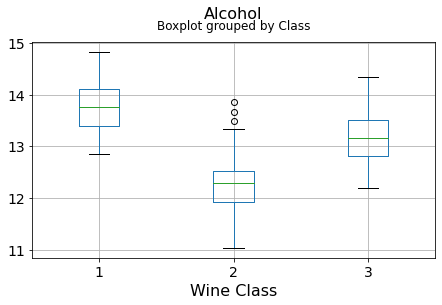

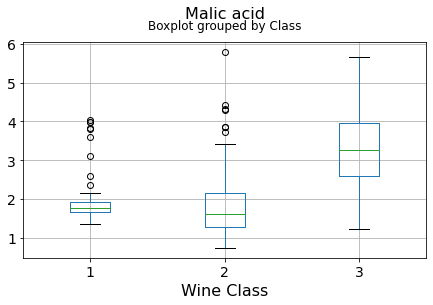

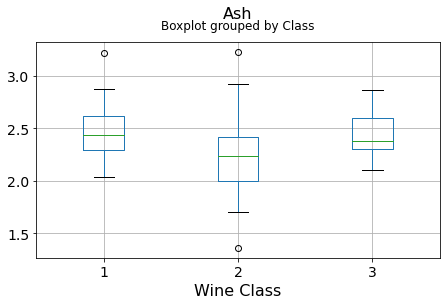

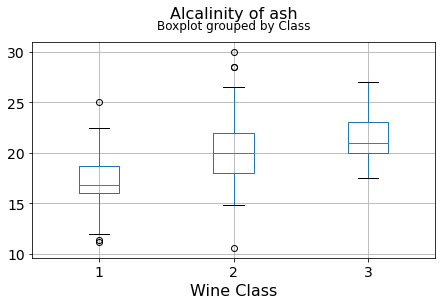

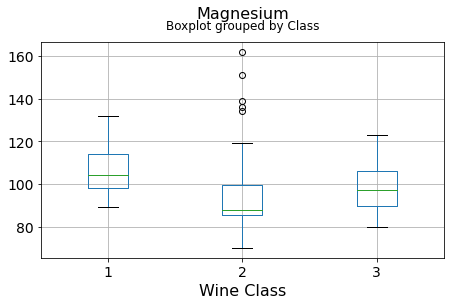

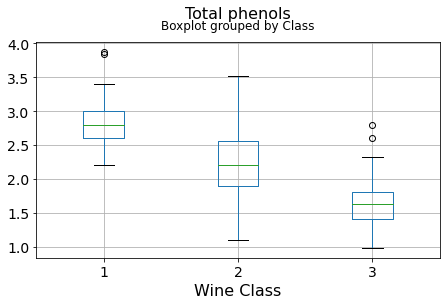

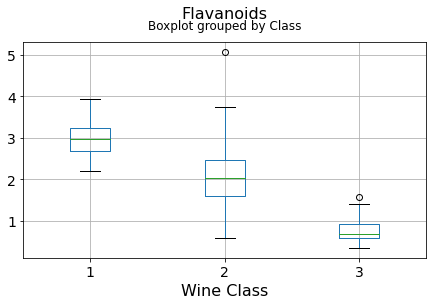

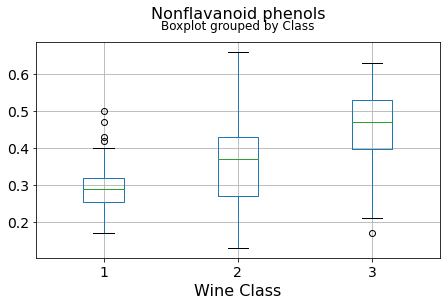

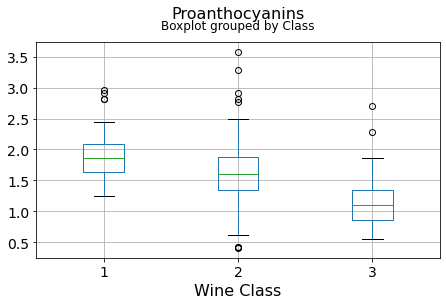

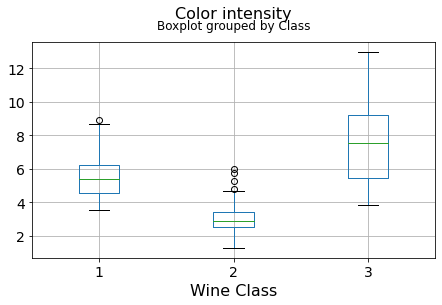

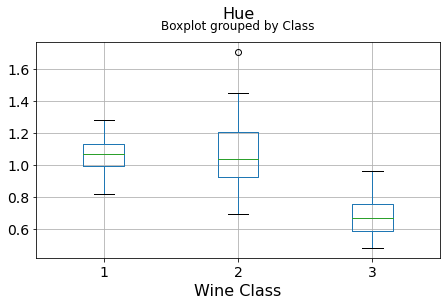

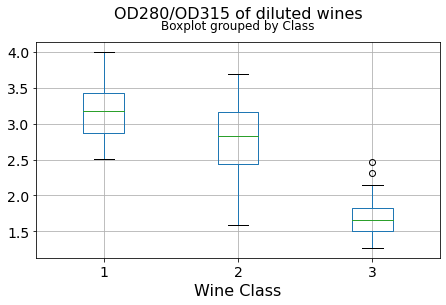

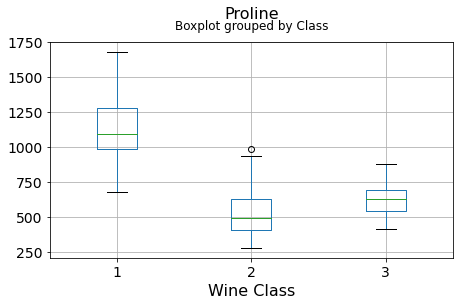

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

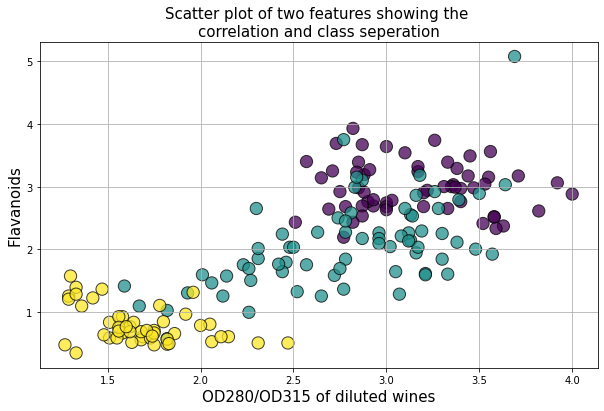

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],
            df['Flavanoids'],
            c=df['Class'],
            edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
dfx.head(10)

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   
5  1.481555   -0.517367  0.305159          -1.289707   0.860705   
6  1.716255   -0.418624  0.305159          -1.469878  -0.262708   
7  1.308617   -0.167278  0.890014          -0.569023   1.492625   
8  2.259772   -0.625086 -0.718336          -1.650049  -0.192495   
9  1.061565   -0.885409 -0.352802          -1.049479  -0.122282   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   
5       1.562093    1.366128             -0.176095         0.664217   
6       0.328298    0.492677             -0.498407         0.681738   
7       0.488531    0.482637             -0.417829        -0.597284   
8       0.808997    0.954502             -0.578985         0.681738   
9       1.097417    1.125176             -1.143031         0.453967   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874  
5         0.731870  0.406051                      0.336606  2.239039  
6         0.083015  0.274431                      1.367689  1.729520  
7        -0.003499  0.449924                      1.367689  1.745442  
8         0.061386  0.537671                      0.336606  0.949319  
9         0.935177  0.230557                      1.325316  0.949319

In [ ]:
dfx.describe()

Alcohol    Malic acid           Ash  Alcalinity of ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.382808e-16 -1.197544e-16 -8.370333e-16      -3.991813e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.780000e+02     178.000000  1.780000e+02          1.780000e+02   
mean  -3.991813e-17       0.000000 -3.991813e-16          3.592632e-16   
std    1.002821e+00       1.002821  1.002821e+00          1.002821e+00   
min   -2.088255e+00      -2.107246 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01      -0.885468 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01       0.095960  1.061497e-01         -1.760948e-01   
75%    5.096384e-01       0.808997  8.490851e-01          6.095413e-01   
max    4.371372e+00       2.539515  3.062832e+00          2.402403e+00   

       Proanthocyanins  Color intensity           Hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.197544e-16     2.494883e-17  1.995907e-16   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       OD280/OD315 of diluted wines       Proline  
count                  1.780000e+02  1.780000e+02  
mean                   3.193450e-16 -1.596725e-16  
std                    1.002821e+00  1.002821e+00  
min                   -1.895054e+00 -1.493188e+00  
25%                   -9.522483e-01 -7.846378e-01  
50%                    2.377348e-01 -2.337204e-01  
75%                    7.885875e-01  7.582494e-01  
max                    1.960915e+00  2.971473e+00

## Sequential Feature Selection [[ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)]

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
sfs_forward = SequentialFeatureSelector(
    clf, n_features_to_select=2, direction="forward" ).fit(X, y)

In [ ]:
sfs_forward.get_feature_names_out()

array(['x0', 'x6'], dtype=object)

In [ ]:
dfx_sfs = dfx.loc[:, sfs_forward.get_support()]

In [ ]:
dfx_sfs

Alcohol  Flavanoids
0    1.518613    1.034819
1    0.246290    0.733629
2    0.196879    1.215533
3    1.691550    1.466525
4    0.295700    0.663351
..        ...         ...
173  0.876275   -1.424900
174  0.493343   -1.284344
175  0.332758   -1.344582
176  0.209232   -1.354622
177  1.395086   -1.274305

[178 rows x 2 columns]

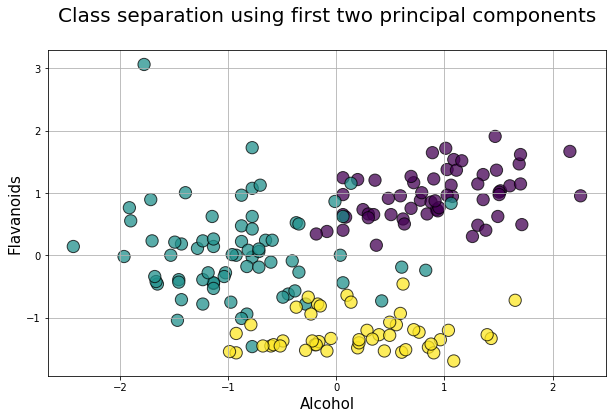

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_sfs.iloc[:, 0],dfx_sfs.iloc[:, 1],
            c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

## Principal Component Analysis [[ref](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Principal%20Component%20Analysis.ipynb)]

### PCA class import and analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

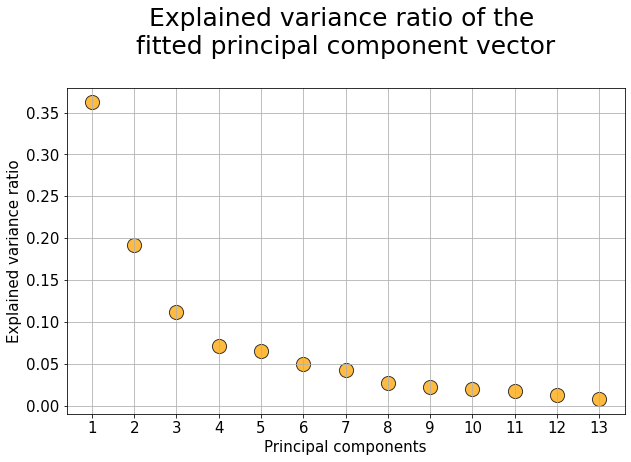

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [ ]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

0         1         2         3         4         5         6   \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
5  3.050254 -2.122401 -0.629396 -0.515637 -0.632019  0.123431  0.401654   
6  2.449090 -1.174850 -0.977095 -0.065831 -1.027762 -0.620121  0.052891   
7  2.059437 -1.608963  0.146282 -1.192608  0.076903 -1.439806  0.032376   
8  2.510874 -0.918071 -1.770969  0.056270 -0.892257 -0.129181  0.125285   
9  2.753628 -0.789438 -0.984247  0.349382 -0.468553  0.163392 -0.874352   

         7         8         9         10        11        12  
0  0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1  1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2 -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3  0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4  0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
5  0.394893 -0.152146 -0.101996  0.405585 -0.379433  0.145155  
6 -0.371934 -0.457016  1.016563 -0.442433  0.141230 -0.271778  
7  0.232979  0.123370  0.735600  0.293555  0.379663 -0.110164  
8 -0.499578  0.606589  0.174107 -0.508933 -0.635249  0.142084  
9  0.150580  0.230489  0.179420  0.012478  0.550327 -0.042455

#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

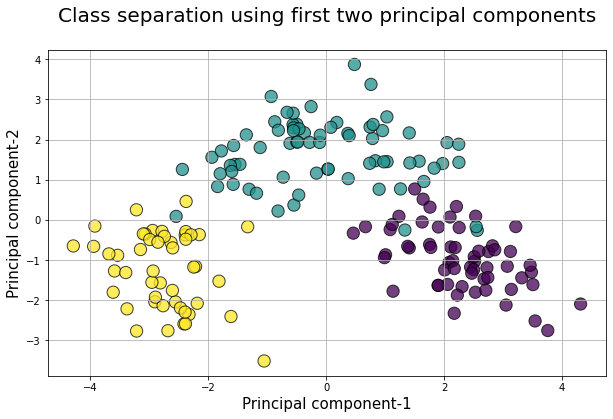

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

#TODO! Dimensionality Reduction & Classification

In [ ]:
from sklearn.datasets import load_breast_cancer

BreastData = load_breast_cancer()

In [ ]:
X = BreastData.data
y = BreastData.target

In [ ]:
X.shape

(569, 30)

In [ ]:
# df = pd.DataFrame(BreastData)
# df
BreastData.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Feature Selection 혹은 Extraction 적용하기
다양한 전처리 및 차원 축소를 수행하여 보다 좋은 형태의 입력인 `X_rdc`를 산출하시오. 

**[주의]** 전처리 및 축소 부분만 수정하여야 합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scaler = StandardScaler()
####### Complete your code ##########
breast_df = pd.DataFrame(BreastData['data'], columns=BreastData['feature_names'])
breast_df['diagnosis'] = BreastData.target

#####################################
X = breast_df.drop(columns=['diagnosis'])
#scaling 전처리
X= scaler.fit_transform(X)

#Removing features with low variance 처리
sel = VarianceThreshold(threshold=(.8*(1 - .8)))
X_rdc = sel.fit_transform(X)
#y = breast_df['diagnosis']

## Data Split
아래 분류기는 고정하고, 입력 데이터 `X`에만 변화를 주시오.
**[주의]** 수정하지 마시오.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rdc, y, test_size = 0.30, random_state=0)

## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation
학습된 분류기를 평가하시오. 정확도 기준 차등 평가를 할 예정입니다.
- 0.970 < : 50 점
- 0.965 ~ 0.970: 40 점
- 0.960 ~ 0.965 : 30 점
- 0.960 > : 20 점

**[주의]** 수정하지 마시오.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, predictions)}')

accuracy: 0.9766081871345029


#**Image Processing**







##Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**







In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

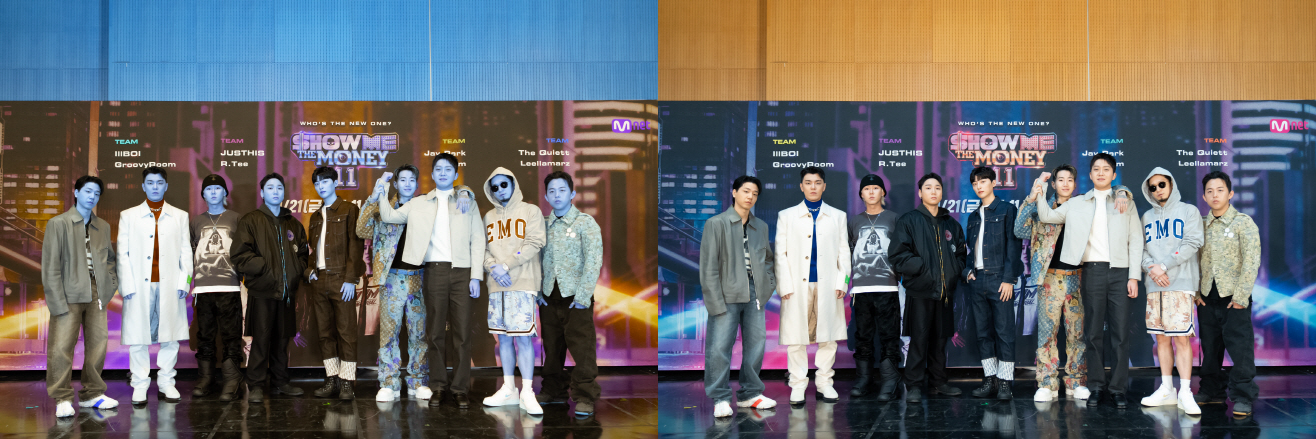

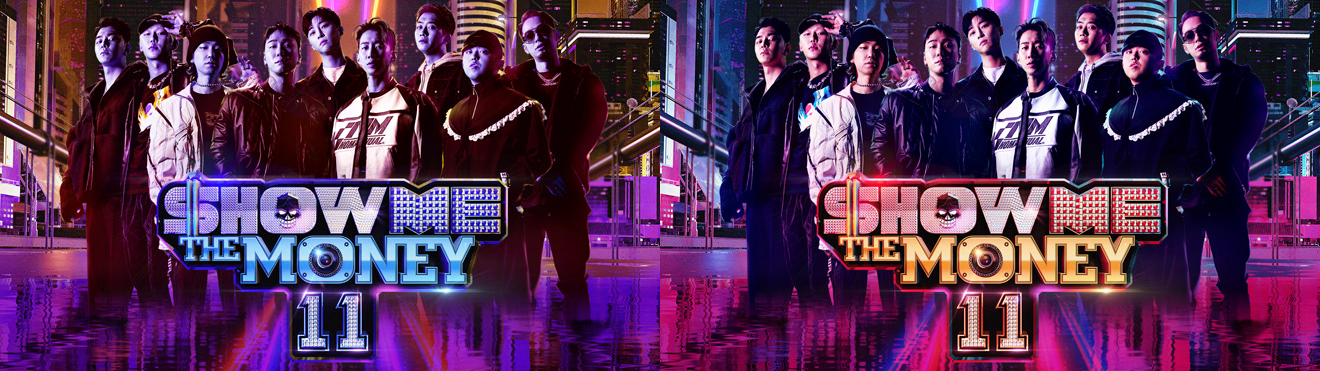

In [ ]:
# Create a list to store the urls of the images
urls = ["https://img.asiatoday.co.kr/file/2022y/10m/21d/2022102101001750500106221.jpg",
        "https://static.mnetjp.com/res/program/2956/pg6358d83d356e9.jpg"
        ]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  final_frame = cv2.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

##Step3: Image Contours and Histograms

### Generate Histogram of grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

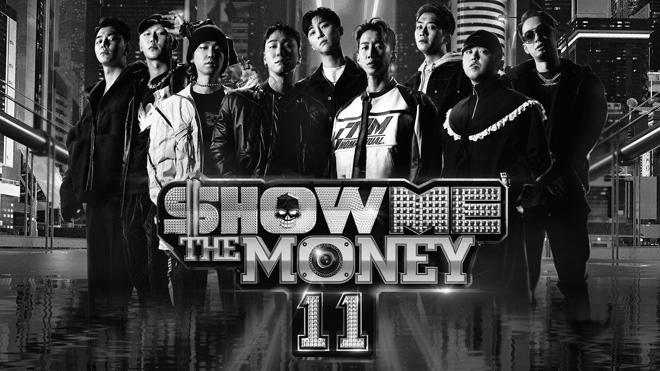

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

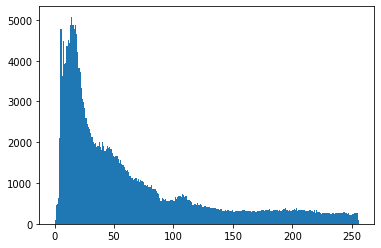

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

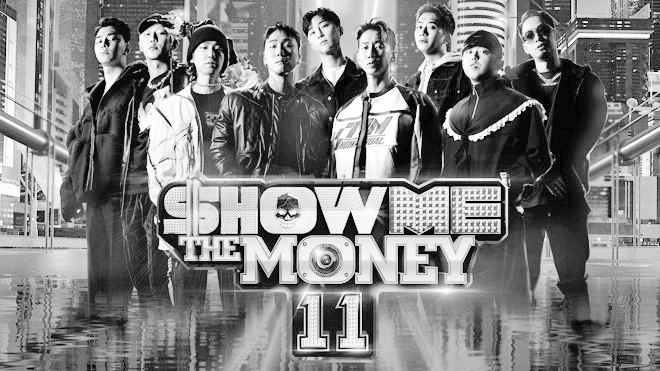

In [ ]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
HE_image = cv2.equalizeHist(gray_image)
cv2_imshow(HE_image)

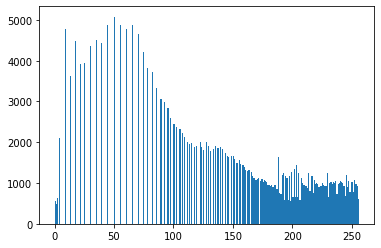

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(HE_image.ravel(),bins = 256, range = [0, 256])
plt.show()

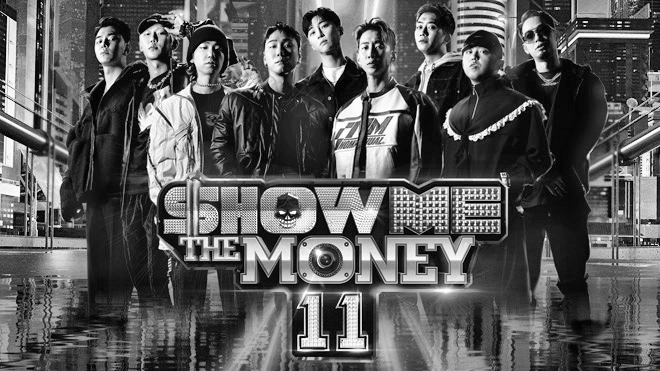

In [ ]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
CLAHE_image = clahe.apply(gray_image)
cv2_imshow(CLAHE_image)

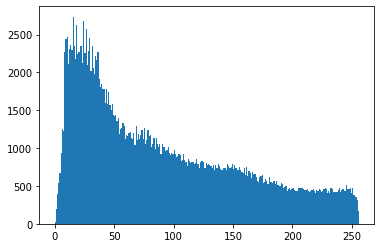

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(CLAHE_image.ravel(),bins = 256, range = [0, 256])
plt.show()

## Add noise and apply smoothing


Orignal Image


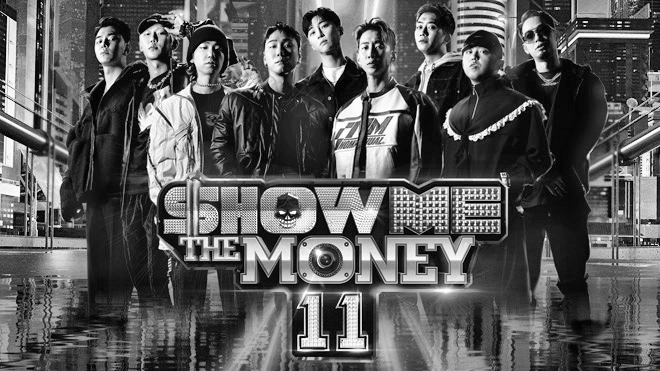


Noise


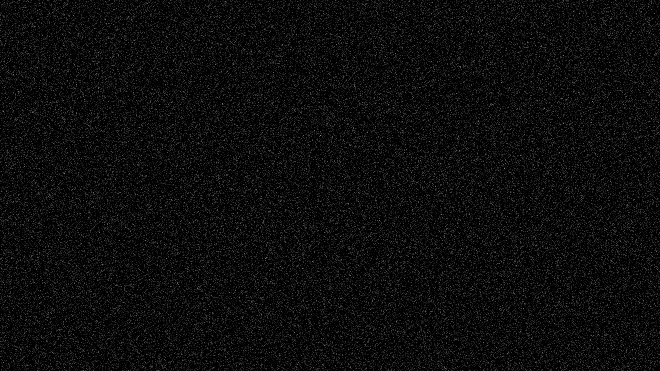


Noisy Image


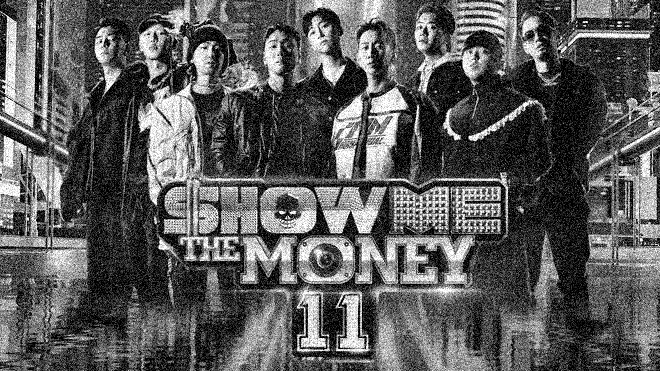


Smoothed Image


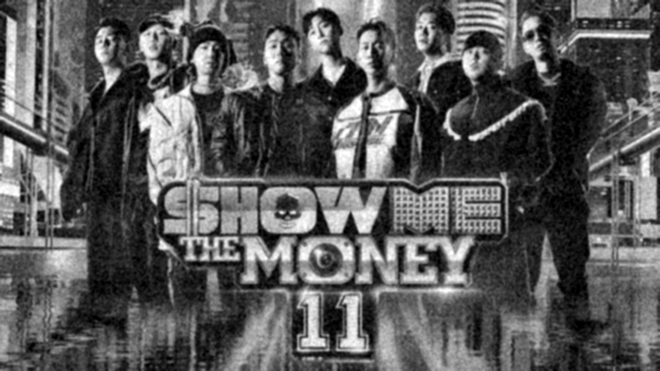

In [ ]:
# noise generation
noise = np.random.normal(loc=0, scale=30, size=CLAHE_image.shape)

# noise overlaid over image
noisy_image = CLAHE_image + noise

# remove noise with smoothing
blur_image = cv2.GaussianBlur(noisy_image, (5,5), 0)

print("\nOrignal Image")
cv2_imshow(CLAHE_image)

print("\nNoise")
cv2_imshow(noise)

print("\nNoisy Image")
cv2_imshow(noisy_image)

print("\nSmoothed Image")
cv2_imshow(blur_image)

## Face detection
Download haar features `.xml` at github [repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)

For face detection you should download `haarcascade_frontalface_default.xml`.

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-12-02 06:36:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-12-02 06:36:25 (26.7 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



Using LPB classifier, find faces in picture.

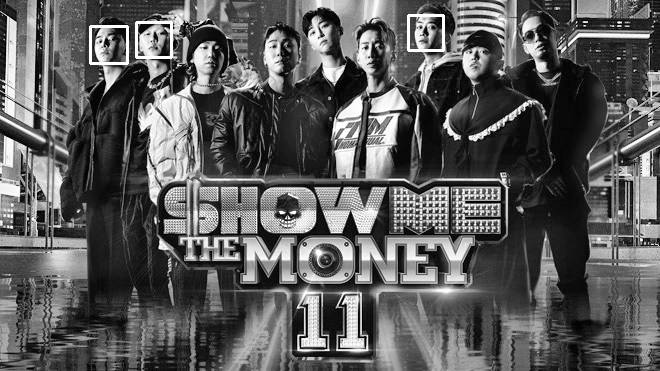

In [ ]:
# Load the haar cascade face classifier file
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Get the faces coordinates for all the faces in the image
faces_cordinates = haar_cascade.detectMultiScale(CLAHE_image);

copy_image = CLAHE_image.copy()
# Draw rectangle on detected faces
for (x1,y1,x2,y2) in faces_cordinates:
  cv2.rectangle(copy_image, (x1, y1), (x1+x2, y1+y2), (255), 2)

cv2_imshow(copy_image)

---
# TODO: 임의의 사진을 불러와서 OpenCV의 여러 기능을 적용하시오.

이미지 불러오기. 구글 등을 통해 검색하여 찾은 이미지의 주소를 이용하여 이미지를 불러오시오. [10점]

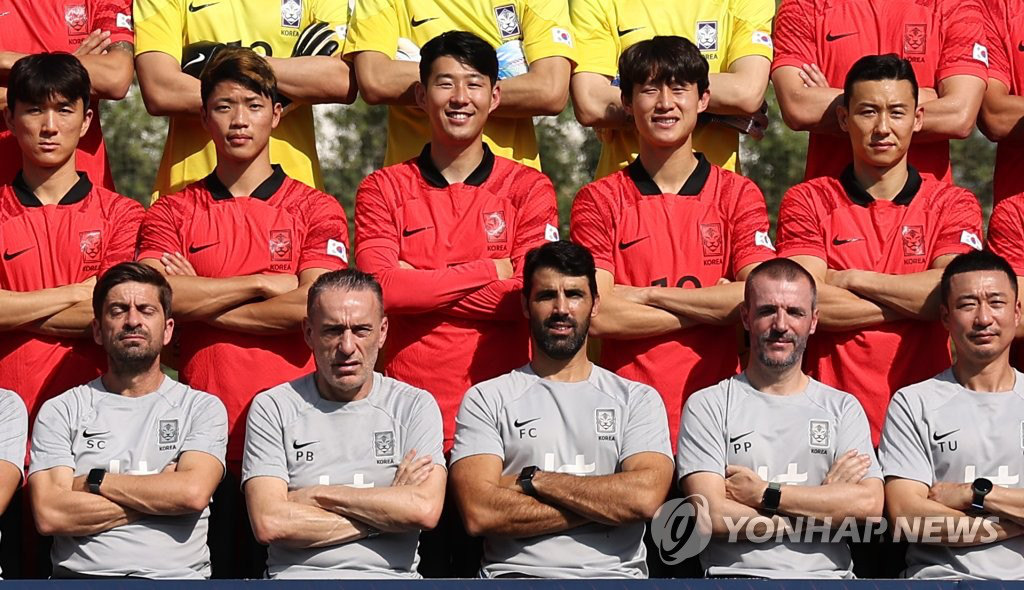

In [ ]:
## TODO: LOAD IMAGE
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

          
url = "https://img1.yna.co.kr/photo/yna/YH/2022/11/16/PYH2022111617950001300_P4.jpg"

myImg = io.imread(url)
myImg =cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)
cv2_imshow(myImg)

다양한 이미지 전처리를 적용하시오. [개당 10점, 최소 2개]
- resize
- bluring
- histogram equalization
- flip
- and so on.

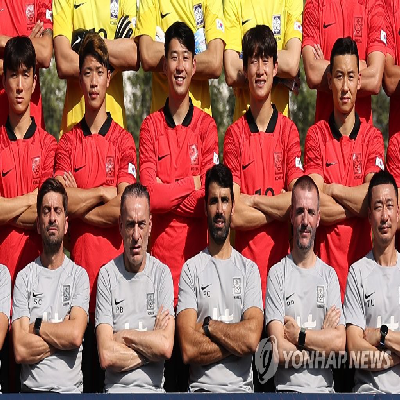

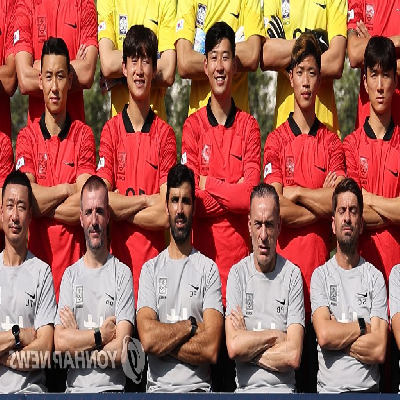

In [ ]:
#resize
image_resize = cv2.resize(myImg, (400,400), interpolation = cv2.INTER_NEAREST)
cv2_imshow(image_resize)
#flip
image_flip = cv2.flip(image_resize,1)
cv2_imshow(image_flip)
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

LPB 분류기를 이용하여, 이미지 내에 오브젝트를 탐지해보시오 [20점].

학습된 다양한 Haar feature들은 [github repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)에서 찾을 수 있습니다.

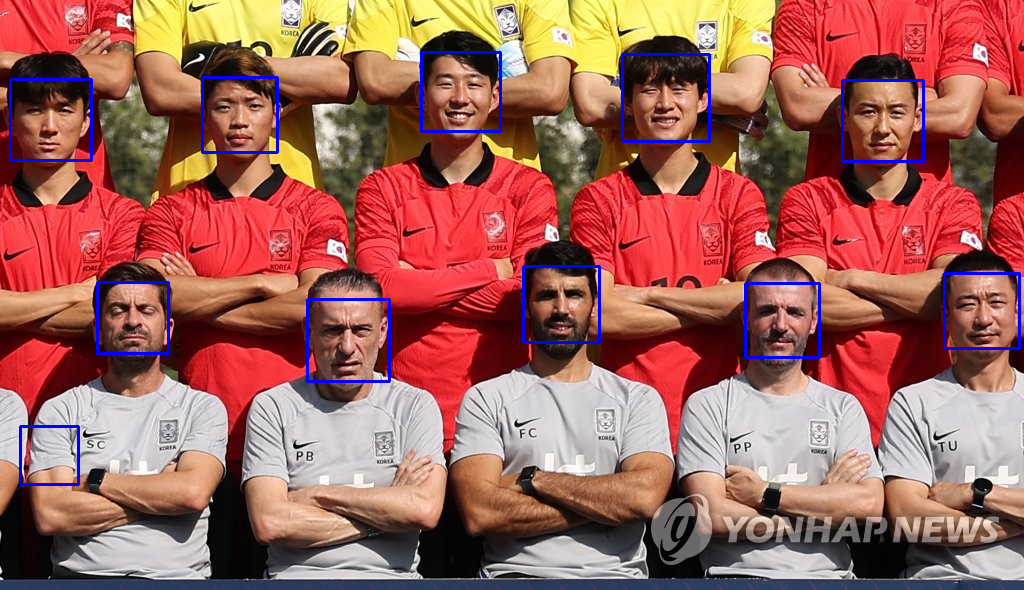

In [ ]:
# Load the haar cascade face classifier file
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Get the faces coordinates for all the faces in the image
object_cordinates = haar_cascade.detectMultiScale(myImg);

copy_image = myImg.copy()

# Draw rectangle on detected faces
for (x1,y1,x2,y2) in object_cordinates:
  cv2.rectangle(copy_image, (x1, y1), (x1+x2, y1+y2), (255), 2)

cv2_imshow(copy_image)

#Analyzing Text Data

In [ ]:
# Import spacy
import spacy

# Loading NLTK module
import nltk

# downloading punkt
nltk.download('punkt')

# downloading stopwords
nltk.download('stopwords')

# downloading omw-1.4
nltk.download('omw-1.4')

# downloading wordnet
nltk.download('wordnet')

# downloading average_perception_tagger 
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Tokenization

In [ ]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize #문장으로 tokenization
 
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
tokenized_sentences=sent_tokenize(paragraph)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [ ]:
# Loading english language model 
nlp = spacy.load("en_core_web_sm")
 
# Append the sentencizer pipe to the nlp pipeline
nlp.add_pipe('sentencizer')
 
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in a documents.
nlp_doc = nlp(paragraph)
 
# Generate list of tokenized sentence
tokenized_sentences = []
for sentence in nlp_doc.sents:
    tokenized_sentences.append(sentence.text)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [ ]:
# Import nltk word_tokenize method
from nltk.tokenize import word_tokenize
 
# Split paragraph into words
tokenized_words=word_tokenize(paragraph)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [ ]:
# Loading english language model 
nlp = spacy.load("en_core_web_sm")
 
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)
 
# tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [ ]:
# Import frequency distribution  
from nltk.probability import FreqDist
 
# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)
 
# Check top 5 common words
fdist.most_common(5)

[('of', 4), ('the', 3), ('.', 3), ('Mahal', 2), ('is', 2)]

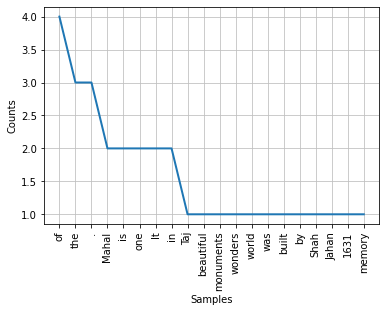

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt
 
# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

## Stopwords

In [ ]:
# import the nltk stopwords 
from nltk.corpus import stopwords
 
# Load english stopwords list
stopwords_set=set(stopwords.words("english"))
 
print(stopwords_set)

{'the', 'all', 'her', 'have', 'it', 'having', 'against', 'a', 'up', 'above', "shouldn't", 'me', 'this', 'or', 'ma', 'be', 'no', 'being', 'now', 'hasn', 'didn', "isn't", 'while', 'below', 'your', 'between', 'yours', 'does', 'were', 'are', 'but', "it's", 'wasn', 'when', 'mightn', "that'll", 'themselves', 'did', 'again', 'to', 'both', 'hadn', "wouldn't", 'with', 'if', 'will', 'had', 'as', 'of', 'who', 'once', 'same', "weren't", 're', 'aren', 'before', 'there', 'yourself', "she's", 'just', 'them', "hadn't", 'needn', 'won', 'is', 'than', "doesn't", 'into', 'am', 'off', 'he', 'not', 'few', 'which', 'such', 'our', 'his', 'wouldn', "you're", 'down', 'here', 'where', 'very', "hasn't", 'an', 'then', "you'll", 'their', 'those', 'what', 'on', 'most', 'don', 'so', "haven't", 'couldn', "don't", 'been', 's', 'any', 'mustn', 'ours', 've', "should've", 'him', 'shan', 'whom', 'other', 'through', 'herself', 'doing', 'should', 'further', "won't", 'll', 'these', "didn't", 'myself', 'under', "wasn't", 'each

In [ ]:
# Removing stopwords from text
filtered_word_list=[]
for word in tokenized_words:
    # filter stopwords
    if word not in stopwords_set:
        filtered_word_list.append(word)

# print tokenized words
print("Tokenized Word List:", tokenized_words)

# print filtered words
print("Filtered Word List:", filtered_word_list)

Tokenized Word List: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']
Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [ ]:
# Loading english language model 
nlp = spacy.load("en_core_web_sm")
 
# text paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)
 
# Removing stopwords from text
filtered_token_list=[]
for token in my_doc:
    # filter stopwords 
    if token.is_stop==False:
        filtered_token_list.append(token)
        
print("Filtered Word List:",filtered_token_list)

Filtered Word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal, .]


## Stemming and Lemmatization

In [ ]:
# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

# Create lemmatizer object
lemmatizer = WordNetLemmatizer()
 
# Import Porter Stemmer
from nltk.stem.porter import PorterStemmer

# Create stemmer object
stemmer = PorterStemmer()

# take a sample word
sample_word = "crying"

print("Lemmatized Sample Word:", lemmatizer.lemmatize(sample_word,"v"))

print("Stemmed Sample Word:", stemmer.stem(sample_word))

Lemmatized Sample Word: cry
Stemmed Sample Word: cri


In [ ]:
# Loading english language model 
nlp = spacy.load("en_core_web_sm")
 
# Create nlp Object to handle linguistic annotations in documents.
words = nlp("cry cries crying")
 
# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)

Original Word:  cry
Lemmatized Word:  cry
Original Word:  cries
Lemmatized Word:  cry
Original Word:  crying
Lemmatized Word:  cry


## PoS Tagging

In [ ]:
# import Word Tokenizer and Pos Tagger
from nltk.tokenize import word_tokenize
from nltk import pos_tag
 
# Sample sentence
sentence = "Taj Mahal is one of the beautiful monument."
 
# Tokenize the sentence
sent_tokens = word_tokenize(sentence)
 
# Create PoS tags
sent_pos = pos_tag(sent_tokens)
 
# Print tokens with PoS
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [ ]:
# Loading small english language model 
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(u"Taj Mahal is one of the beautiful monument.")
 
for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


## Entity Recognition

In [ ]:
# Load English model for tokenizer, tagger, parser, and NER 
nlp = spacy.load('en_core_web_sm') 
 
# Sample paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in documents.
docs=nlp(paragraph)
 
entities=[(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON'), ('Shah Jahan', 'PERSON'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'PERSON')]


In [ ]:
# Import display for visualizing the Entities
from spacy import displacy
 # Visualize the entities using render function
displacy.render(docs, style = "ent",jupyter = True)

## Dependency Parsing

In [ ]:
# Load English model for tokenizer, tagger, parser, and NER 
nlp = spacy.load('en_core_web_sm') 
 
# Sample sentence
sentence="Taj Mahal is one of the beautiful monument."

# Create nlp Object to handle linguistic annotations in a documents.
docs=nlp(sentence)
 
# Visualize the  using render function
displacy.render(docs, style="dep", jupyter= True, options={'distance': 150})

## WordCloud

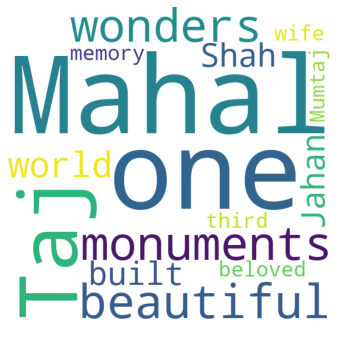

In [ ]:
# importing all necessary modules 
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
 
stopword_list = set(STOPWORDS) 
 
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
word_cloud = WordCloud(width = 550, height = 550, 
                       background_color ='white', 
                       stopwords = stopword_list, 
                       min_font_size = 10).generate(paragraph) 
  
# Visualize the WordCloud Plot

# Set wordcloud figure size
plt.figure(figsize = (8, 6)) 
# Show image
plt.imshow(word_cloud) 
# Remove Axis
plt.axis("off")  
# show plot
plt.show() 

## Sentiment Analysis using Text Classification

### Classification using Bag of Words

#### Load the Dataset

In [ ]:
# Import libraries
import pandas as pd

# read the dataset
copus_url = 'https://raw.githubusercontent.com/sharmaroshan/Amazon-Alexa-Reviews/master/amazon_alexa.tsv'
df=pd.read_csv(copus_url, sep='\t')
    
# Show top 5-records
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

#### Explore the dataset

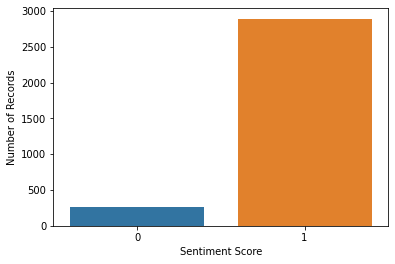

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
 
# Count plot
sns.countplot(x='feedback', data=df)
 
# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')
 
# Show the plot using show() function
plt.show()


#### Feature Generation using CountVectorizer 

In [ ]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

 
# Create Regex tokenizer for removing special symbols and numeric values 
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True, 
                     stop_words='english', 
                     ngram_range = (1,1), 
                     tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

#### Split train and test set

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
 
# Partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### Classification Model Building using Logistic Regression

In [ ]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

#### Evaluate the Classification Model

In [ ]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9428571428571428
Logistic Regression Model Precision: 0.952433628318584
Logistic Regression Model Recall: 0.9873853211009175
Logistic Regression Model F1-Score: 0.9695945945945945


### Classification using TF-IDF

In [ ]:
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values 
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df['verified_reviews'])

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
 
# Partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    text_tfidf, df['feedback'], test_size=0.3, random_state=1)

In [ ]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [ ]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 0.923728813559322
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.960352422907489


## Text Similarity

In [ ]:
def jaccard_similarity(sent1, sent2):
    """Find text similarity using jaccard similarity"""
    
    # Tokenize sentences
    token1 = set(sent1.split())
    token2 = set(sent2.split())
     
    # intersection between tokens of two sentences    
    intersection_tokens = token1.intersection(token2)
    
    # Union between tokens of two sentences
    union_tokens=token1.union(token2)
    
    # Cosine Similarity
    sim_= float(len(intersection_tokens) / len(union_tokens))
    return sim_

# Call function
jaccard_similarity('I love pets.','I hate pets.')

0.5

In [ ]:
# Let's import text feature extraction TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
 
docs=['I love pets.','I hate pets.']
 
# Initialize TfidfVectorizer object
tfidf= TfidfVectorizer()
 
# Fit and transform the given data
tfidf_vector = tfidf.fit_transform(docs)
 
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
 
# compute similarity using cosine similarity
cos_sim=cosine_similarity(tfidf_vector[0], tfidf_vector[1])
print(cos_sim)

[[0.33609693]]


In [ ]:
# Load English model for tokenizer, tagger, parser, and NER 
nlp = spacy.load('en_core_web_sm') 
 
# Create documents
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')
 
# Find similarity
print(doc1.similarity(doc2))

0.6583500043020688


<ipython-input-31-09abbeb5300b>:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-09 19:05:56.784360: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 6.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Import spacy
import spacy
 
# Load English model for tokenizer, tagger, parser, and NER 
nlp = spacy.load('en_core_web_lg') 
 
# Create documents
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')
 
# Find similarity
print(doc1.similarity(doc2))

0.9041243947777828




---


# [자율 과제] Sentiment Analysis!
앞서 다루었던 Sentiment Analysis를 기반으로 아래의 제안들 중 하나를 적용해보세요.
- 데이터셋 교체: Amazon의 데이터가 아닌 다른 데이터를 활용해보세요. [Reference](https://research.aimultiple.com/sentiment-analysis-dataset/)
- 분류기 교체: Logistic Regression 대신 다른 classifier를 적용해보세요.
- n-gram, stopwords 등 전처리 기법을 추가로 적용하거나 제외해보세요.

*기말고사를 앞둔 관계로 자율적으로 수행하시기 바랍니다. 채점을 진행하지 않을 예정입니다.*


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up DataFrame

In [ ]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df['diagnosis'] = cancer.target
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890          0  
1          0.2750                  0.08902          0  
2          0.3613                  0.08758          0  
3          0.6638                  0.17300          0  
4          0.2364                  0.07678          0  

[5 rows x 31 columns]

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

# Train the Support Vector Classifier
**[TODO]** Train the SVM Classifier with `gamma='auto` using `X_train` and `y_train`.

In [ ]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train, y_train)

SVC(gamma='auto')

## Predictions and Evaluations

**[TODO]** Now let's predict using the trained model.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[  0  63]
 [  0 108]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# Gridsearch

Finding the right parameters (like what `C` or `gamma values` to use) is a tricky task!

But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a `grid` of parameters and just trying out all the possible combinations is called a `Gridsearch`, this method is common enough that Scikit-learn has this functionality built in with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)! The CV stands for cross-validation.

The `GridSearchCV` takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, grid_predictions))

[[ 59   4]
 [  3 105]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Todo 1

* 위의 실습에서 사용한 유방암 진단 데이터셋에 여러 모델을 적용해보고 모델의 성능을 accuracy, precision, recall, f1 score를 이용하여 확인하는 문제입니다.

### 1.1 다양한 분류기를 이용하여 분석 모델을 구축하기. 아래 모델들 중 자유롭게 선정하여 구현해보세요.
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#)
* [kNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneigh#)
* [Naïve Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#)
* [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
* [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#)





In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 예측 결과 구하기
y_predict = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 1.2 생성한 모델의 성능 확인하기

* 분류에 대한 성능 지표(accuracy, precision, recall, f1 score)를 통해 생성한 모델의 성능을 확인한다.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# model accuarcy
accuracy = accuracy_score(y_test,y_predict)

# model precision
precision = precision_score(y_test,y_predict)

# model recall
recall = recall_score(y_test,y_predict)

# model f1 score
f1 = f1_score(y_test,y_predict)

In [ ]:
print("Accuracy: {0:.3f}".format(accuracy))
print("Precision: {0:.3f}".format(precision))
print("Recall: {0:.3f}".format(recall))
print("F1-Score: {0:.3f}".format(f1))

Accuracy: 0.953
Precision: 0.981
Recall: 0.944
F1-Score: 0.962


# Todo 2

와인의 화학 성분 데이터를 활용하여 여러 classification 중 원하는 모델을 자유롭게 사용하여 와인의 종류를 구분하고 생성한 모델의 accuracy를 확인하는 문제입니다.

## 2.1 데이터 로드 및 전처리

* Data를 원하는 방법으로 전처리 하세요.

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()


In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## 2.2 데이터 탐색하고 Train_set, Test_set 나누기

* test_size = 0.3, random_state = 0

In [ ]:
# 데이터 셋의 설명 확인하기
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
print(wine['feature_names'])
print(wine['target_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [ ]:
#dataframe으로 만들어주기
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['diagnosis'] = wine.target
# X, Y 설정
X = wine_df.drop(columns=['diagnosis'])
y = wine_df['diagnosis']

In [ ]:
#drop이 성능에 미치치지 않음
# sns.heatmap(wine_df.drop(columns='diagnosis').corr() , annot=True)  
# wine_df=wine_df.drop(columns=['flavanoids','total_phenols'])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련용 데이터와 평가용 데이터 분할 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

##2.3 원하는 모델을 이용하여 분석 모델 구축하기

* 다양한 모델을 사용하여 학습하기

In [ ]:
# Decision Tree
# from sklearn import tree
# model = tree.DecisionTreeClassifier()
# model.fit(X_train, Y_train)
# Y_predict = model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, Y_train)
Y_predict=rf.predict(X_test)



# # 모델생성
# model = LogisticRegression()

# # 모델 훈련
# model.fit(X_train,Y_train)

# # 평가 데이터로 예측 수행하여 예측값 구하기
# Y_predict = model.predict(X_test)

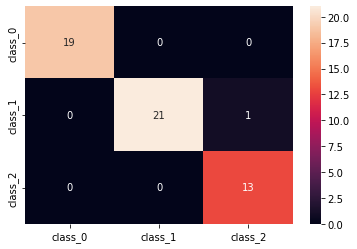

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict), columns=wine.target_names, index=wine.target_names)
sns.heatmap(cm, annot=True)

##2.4 생성한 모델의 성능 확인하기

* accuracy 를 출력하세요. 


In [ ]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
# model accuarcy
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: {0:.3f}".format(accuracy))

Accuracy: 0.981


##2.5 채점 기준

- Accuracy 점수가 95 이상: **50점 (만점)**
- Accuracy 점수가 93 이상, 95미만: **45점**
- Accuracy 점수가 90 이상, 93미만: **40점**
- Accuracy 점수가 90 미만: **35점**